**Проект: использование средств Python для расчёта и визуализации статистических свойств выборки**

Выборка — задача многоклассовой классификации [ирисов Фишера](https://).

In [1]:
import warnings
warnings.simplefilter('ignore')

In [2]:
from sklearn import datasets
iris = datasets.load_iris()

In [3]:
dataset = iris['data']

In [4]:
target = iris['target']

In [5]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [7]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

1. Посчитать основные характеристики выборки по каждому признаку:
- среднее;
- дисперсия;
- минимум;
- максимум;
- размах.

In [8]:
import numpy as np

In [9]:
print("Признак\t\t\tСреднее Дисперсия Минимум Максимум Размах")
for i, name in enumerate(iris.feature_names):
    print(f"{name:18}:", end='\t')
    print(f"{round(dataset[:,i].mean(), 2):5}", end='\t')
    print(f"{round(dataset[:,i].var(), 2):6}", end='\t')
    print(f"{round(dataset[:,i].min(), 2):7}", end='\t')
    print(f"{round(dataset[:,i].max(), 2):7}", end='\t')
    print(f"{round(dataset[:,i].ptp(), 2):8}", end='\n')

Признак			Среднее Дисперсия Минимум Максимум Размах
sepal length (cm) :	 5.84	  0.68	    4.3	    7.9	     3.6
sepal width (cm)  :	 3.06	  0.19	    2.0	    4.4	     2.4
petal length (cm) :	 3.76	   3.1	    1.0	    6.9	     5.9
petal width (cm)  :	  1.2	  0.58	    0.1	    2.5	     2.4


2. Визуализировать распределения признаков посредством seaborn.

In [10]:
import seaborn as sns

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


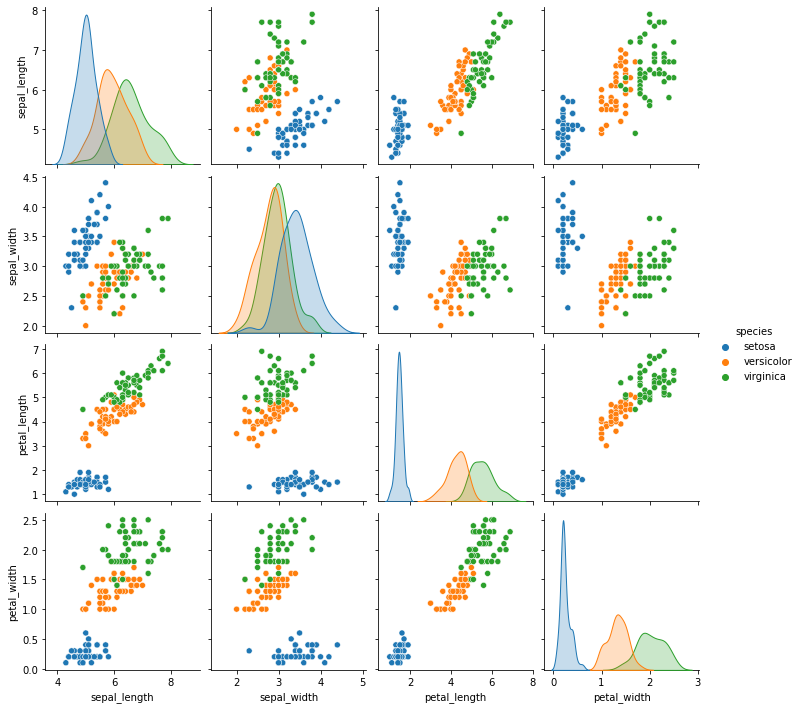

In [13]:
sns.pairplot(df, hue='species')

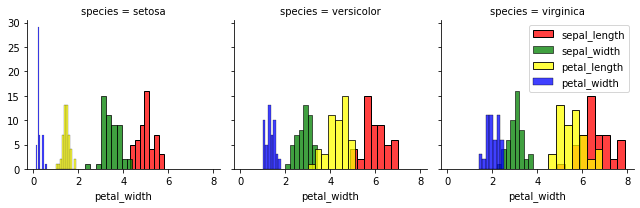

In [14]:
g = sns.FacetGrid (data=df, col='species', col_wrap= 3 )
g.map(sns.histplot , 'sepal_length', color='red');
g.map(sns.histplot , 'sepal_width', color='green');
g.map(sns.histplot , 'petal_length', color='yellow');
g.map(sns.histplot , 'petal_width', color='blue');
plt.legend(labels=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

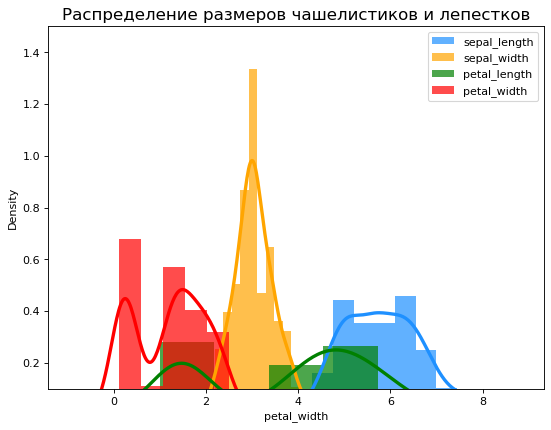

In [15]:
plt.figure(figsize=(8,6), dpi= 80)
sns.distplot(df.sepal_length, color="dodgerblue", label="sepal_length", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})
sns.distplot(df.sepal_width, color="orange", label="sepal_width", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})
sns.distplot(df.petal_length, color="g", label="petal_length", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})
sns.distplot(df.petal_width, color="red", label="petal_width", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})
plt.ylim(0.1, 1.5)

# Decoration
plt.title('Распределение размеров чашелистиков и лепестков', fontsize=15)
plt.legend()
plt.show()

3. Посчитать и визуализировать корреляционную матрицу.

In [16]:
import pandas as pd

In [17]:
data_pd = pd.DataFrame(df)
data_pd.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [18]:
data_pd.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


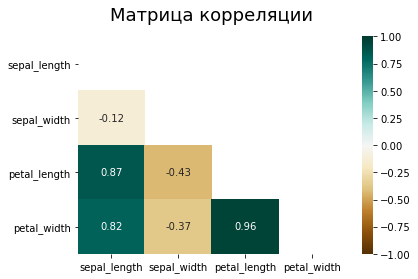

In [19]:
mask = np.triu(np.ones_like(data_pd.corr(), dtype=np.bool)) 
heatmap = sns.heatmap(data_pd.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG') 
heatmap.set_title('Матрица корреляции', fontdict={'fontsize':18}, pad=16);

4. Проверить гипотезу о нормальности распределения для признаков 1 и 2.

In [20]:
from scipy import stats

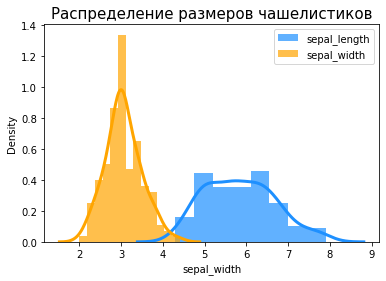

In [21]:
sns.distplot(df.sepal_length, color="dodgerblue", label="sepal_length", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})
sns.distplot(df.sepal_width, color="orange", label="sepal_width", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})

plt.title('Распределение размеров чашелистиков', fontsize=15)
plt.legend()
plt.show()

In [22]:
def test_normality(name, x, alpha=0.05):
    stat, p =name(x)
    print(f"Результат:Statistics=%.3f, p-value=%.3f" % (stat,p))
    return p > alpha

In [23]:
test_normality(stats.shapiro,data_pd.sepal_length)

Результат:Statistics=0.976, p-value=0.010


False

In [24]:
test_normality(stats.shapiro, data_pd.sepal_width)

Результат:Statistics=0.985, p-value=0.101


True

In [25]:
test_normality(stats.normaltest,data_pd.sepal_length)

Результат:Statistics=5.736, p-value=0.057


True

In [26]:
test_normality(stats.normaltest, data_pd.sepal_width)

Результат:Statistics=3.124, p-value=0.210


True

5. Произвести расчёт статистик из пункта 1 для каждого значения таргета (группировка).

In [27]:
data_pd.groupby('species').agg(['mean', 'var', 'min', 'max', np.ptp]).T

species              setosa  versicolor  virginica
sepal_length mean  5.006000    5.936000   6.588000
             var   0.124249    0.266433   0.404343
             min   4.300000    4.900000   4.900000
             max   5.800000    7.000000   7.900000
             ptp   1.500000    2.100000   3.000000
sepal_width  mean  3.428000    2.770000   2.974000
             var   0.143690    0.098469   0.104004
             min   2.300000    2.000000   2.200000
             max   4.400000    3.400000   3.800000
             ptp   2.100000    1.400000   1.600000
petal_length mean  1.462000    4.260000   5.552000
             var   0.030159    0.220816   0.304588
             min   1.000000    3.000000   4.500000
             max   1.900000    5.100000   6.900000
             ptp   0.900000    2.100000   2.400000
petal_width  mean  0.246000    1.326000   2.026000
             var   0.011106    0.039106   0.075433
             min   0.100000    1.000000   1.400000
             max   0.600000    1.800000   2.500000
             ptp   0.500000    0.800000   1.100000

6. Написать функцию, автоматизирующую EDA.

In [28]:
def EDA_df(data):
    
    #'Общая статистика по данным
    
    d = data.describe()
    
    #'Парные графики'   
    
    sns.pairplot(data, hue='species')
    
    #'Графики распределения признаков по классам'
    g = sns.FacetGrid (data=data, col='species', col_wrap= 3 )
    g.map(sns.histplot , 'sepal_length', color='red');
    g.map(sns.histplot , 'sepal_width', color='green');
    g.map(sns.histplot , 'petal_length', color='yellow');
    g.map(sns.histplot , 'petal_width', color='blue');
    plt.legend(labels=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']) 
    
    #'График распределение размеров чашелистиков и лепестков'
    plt.figure(figsize=(8,6), dpi= 80)
    sns.distplot(data.sepal_length, color="dodgerblue", label="sepall_ength", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})
    sns.distplot(data.sepal_width, color="orange", label="sepal width", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})
    sns.distplot(data.petal_length, color="g", label="petal_length", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})
    sns.distplot(data.petal_width, color="red", label="petal_width", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})
    plt.ylim(0.1, 1.5)

    # Decoration
    plt.title('Распределение размеров чашелистиков и лепестков', fontsize=15)
    plt.legend()
    plt.show() 
    
    data_pd = pd.DataFrame(data)
    
    #'Тепловая карта'
    
    mask = np.triu(np.ones_like(data_pd.corr(), dtype=np.bool)) 
    heatmap = sns.heatmap(data_pd.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG') 
    heatmap.set_title('Матрица корреляции', fontdict={'fontsize':18}, pad=16);
    
    #'Корреляционная матрица'
    
    corr = data_pd.corr()
    
    #Функция проверки гипотезы нормального распределения
    
    #'Результат проверки гипотезы о нормальном распределении 1 и 2 признаков'
    
    def test_normality(name, x, alpha=0.05):
        stat, p =name(x)
        print(f"Результат:Statistics=%.3f, p-value=%.3f" % (stat,p))
        return p > alpha
    
    test_normality(stats.shapiro, data_pd.sepal_length)
    test_normality(stats.shapiro, data_pd.sepal_width)
    test_normality(stats.normaltest,data_pd.sepal_length)
    test_normality(stats.normaltest, data_pd.sepal_width)
    
#Расчёт статистик
    stat = data_pd.groupby('species').agg(['mean', 'var', 'min', 'max', np.ptp]).T
    
    return 'Общая статистика =', d,'Корреляционная матрица =', corr,'Статистика по классам =',stat

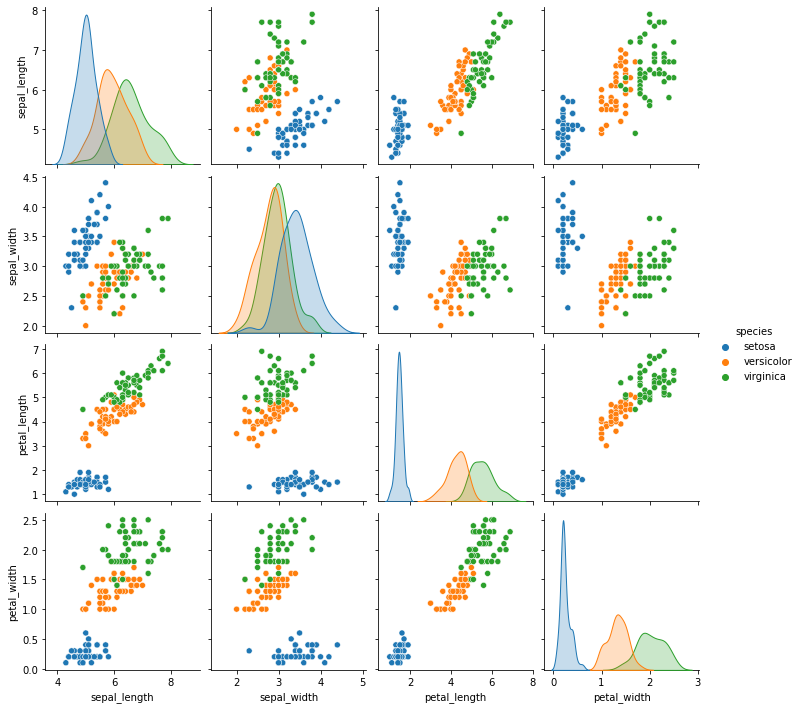

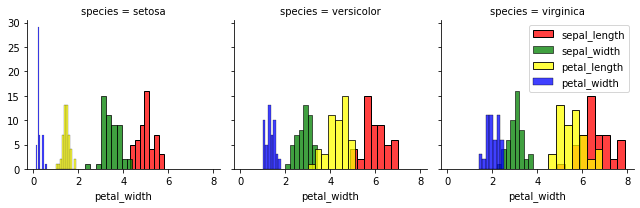

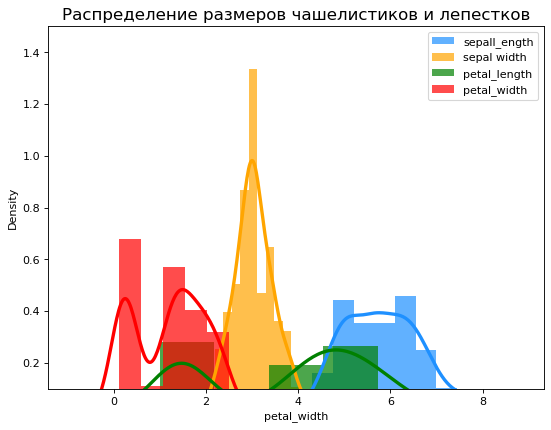

Результат:Statistics=0.976, p-value=0.010
Результат:Statistics=0.985, p-value=0.101
Результат:Statistics=5.736, p-value=0.057
Результат:Statistics=3.124, p-value=0.210


('Общая статистика =',
        sepal_length  sepal_width  petal_length  petal_width
 count    150.000000   150.000000    150.000000   150.000000
 mean       5.843333     3.057333      3.758000     1.199333
 std        0.828066     0.435866      1.765298     0.762238
 min        4.300000     2.000000      1.000000     0.100000
 25%        5.100000     2.800000      1.600000     0.300000
 50%        5.800000     3.000000      4.350000     1.300000
 75%        6.400000     3.300000      5.100000     1.800000
 max        7.900000     4.400000      6.900000     2.500000,
 'Корреляционная матрица =',
               sepal_length  sepal_width  petal_length  petal_width
 sepal_length      1.000000    -0.117570      0.871754     0.817941
 sepal_width      -0.117570     1.000000     -0.428440    -0.366126
 petal_length      0.871754    -0.428440      1.000000     0.962865
 petal_width       0.817941    -0.366126      0.962865     1.000000,
 'Статистика по классам =',
 species              setosa 

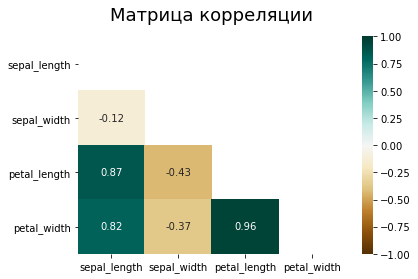

In [29]:
EDA_df(df)

7. Описать основные выводы по каждому разделу проекта. Какие выводы можно сделать на основе проведённого анализа?

* 1. При анализе статистик полученных с помощью numpy мы замечаем большой разлёт по длинам, т. е по признакам sepal_length и petal_length.
* 2. Посмотрев на графики распределения признаков видим потверждение нашего первого наблюдения. Затем мы замечаем, что наглядное и чёткое распределеня у ирисов сорта "setosa", значения признаков не пересекаются с соответствующими значениями других сортов, видно их чёткое распределение, возможно сорт-setosa можно с большей вероятностью предсказать по имеющимся признакам. Признаки сортов Versicolour и Virginica пересекаются между соответствующими значениями по классам.
* 3. Рассмотрев корреляцию признаков, видим большую между признаками petal length (cm) и petal_width(cm) их можно объединить в один или же удалить один из них.
* 4. Проверив гипотезу о нормальном распределении, делаем вывод, что у первых 2 признаков боле-менее нормальное распределение.